In [1]:
%load_ext autoreload
%autoreload 2

import os, sys, time
import glob

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#needed to import utils.py
sys.path.append('../') 

import utils
import utils_preprocessing
import utils_exec_models
import utils_exec_models_new

import numpy as np
import pandas as pd
#to view entire text of the comuns
pd.set_option('display.max_colwidth', None) 

import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns


# Get all results CSV file

In [7]:
path = os.path.abspath('exec_results')


results_by_algorithm = []

for root, folders, files in os.walk(path, topdown=False):

    for name in files:
        if name.endswith('.csv'):

            aux = name.replace('.csv', '').replace('performance__','').split('__')
            algo = aux[0]
            feat = aux[1]
            scen = aux[2]
            es_algo = aux[3] if len(aux) == 4 else ''

            results_by_algorithm.append(
                [algo, feat, scen, es_algo, os.path.join(root, name)]
            )

#                 # get scenario info
#                 if 'Single_Model' in name:
#                     scenario = 'Single Model'
#                 elif 'Ensemble_Imbalance' in name:
#                     scenario = 'Ensemble-Imbalance'
#                 else:
#                     scenario = '[UNDEFINED]'

#                 # get Features info
#                 if 'All_Features' in name:
#                     features = 'All Features'
#                 elif 'without_Diagnosis_Delay' in name:
#                     features = 'Without Diagnosis_Delay'
#                 else:
#                     features = '[UNDEFINED]'

#                 # store result folder    
#                 results_by_algorithm.append(
#                     [
#                         scenario,
#                         features,
#                         os.path.join(root, name),
#                     ]
#                 )

#                 if name.startswith('top_results_'):
#                     top_results_by_algorithm.append(
#                         [
#                             scenario,
#                             features,
#                             os.path.join(root, name),
#                         ]
#                     )

#                 elif name.startswith('_best_results_'):
#                     best_results_all_algorithm.append(
#                         [
#                             scenario,
#                             features,
#                             os.path.join(root, name),
#                         ]
#                     )


print(results_by_algorithm)


[['RadiusNeighbors', 'All_Features', 'Single_Model', '', '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_Models/exec_results/performance__RadiusNeighbors__All_Features__Single_Model.csv'], ['ComplementNB', 'All_Features', 'Single_Model', '', '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_Models/exec_results/performance__ComplementNB__All_Features__Single_Model.csv'], ['ComplementNB', 'All_Features', 'Ensemble_Imbalance', 'BalBagging', '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_Models/exec_results/performance__ComplementNB__All_Features__Ensemble_Imbalance__BalBagging.csv'], ['KNeighbors', 'All_Features', 'Single_Model', '', '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_Models/exec_results/performance__KNeighbors__All_Features__Single_Model.csv'], ['GaussianNB', 'All_Features', 'Ens

# Get the performance for each $scenario$ and $features$

In [78]:
df_all = None

for algorithm, features, scenario, es_algorithm, csv_file in results_by_algorithm:
#     utils.print_string_with_separators(f'{scenario} - {features}')
    df_temp = utils.read_csv(csv_file=csv_file)

    #sort performances
    df_temp = utils_exec_models_new.sort_performances_results(df=df_temp)    

#     # get first 3 results
    df_temp = df_temp.head(3)
#     display(df_temp)

    # acumulate the performances
    if df_all is None:
        df_all = df_temp
    else:
        df_all = pd.concat([df_all, df_temp])

    
df_all = utils_exec_models_new.sort_performances_results(df=df_all).reset_index(drop=True)    
display(df_all.head())

,Scenario,Features,Model,balanced_accuracy,sensitivity,specificity,f1_score,AUC,accuracy,precision,...,Estimator_Class,Estimator_Hyperparams,fit_time,train_balanced_accuracy,train_sensitivity,train_specificity,train_f1_score,train_AUC,train_accuracy,train_precision
0,Ensemble_Imbalance,All_Features,Balanced Bagging,0.85,0.85,0.86,0.58,0.91,0.86,0.44,...,KNeighborsClassifier,"{'algorithm':'auto','leaf_size':30,'metric':'manhattan','metric_params':None,'n_jobs':None,'n_neighbors':15,'p':2,'weights':'uniform'}",0.06,0.77,0.69,0.86,0.52,0.87,0.84,0.42
1,Ensemble_Imbalance,All_Features,Balanced Bagging,0.85,0.85,0.86,0.58,0.91,0.86,0.44,...,KNeighborsClassifier,"{'algorithm':'auto','leaf_size':30,'metric':'manhattan','metric_params':None,'n_jobs':None,'n_neighbors':15,'p':2,'weights':'uniform'}",0.06,0.77,0.69,0.86,0.52,0.87,0.84,0.42
2,Ensemble_Imbalance,All_Features,Balanced Bagging,0.84,0.89,0.78,0.51,0.90,0.80,0.36,...,ComplementNB,"{'alpha':1.5,'class_prior':None,'fit_prior':True,'force_alpha':False,'norm':False}",0.01,0.80,0.77,0.84,0.54,0.89,0.83,0.42
3,Ensemble_Imbalance,All_Features,Balanced Bagging,0.84,0.89,0.78,0.51,0.90,0.80,0.36,...,ComplementNB,"{'alpha':1.5,'class_prior':None,'fit_prior':True,'force_alpha':True,'norm':False}",0.01,0.80,0.77,0.84,0.54,0.89,0.83,0.42
4,Ensemble_Imbalance,All_Features,Balanced Bagging,0.84,0.89,0.78,0.51,0.90,0.80,0.36,...,ComplementNB,"{'alpha':1.5,'class_prior':None,'fit_prior':True,'force_alpha':False,'norm':False}",0.01,0.80,0.77,0.84,0.54,0.89,0.83,0.42


In [89]:
df_all.fillna('', inplace=True)

df_all['Algorithm'] = df_all.Estimator_Class + ' ' + df_all.Model_Class    
df_all.Algorithm = df_all.Algorithm.str.replace('BalancedBagging', '').str.replace('Classifier', '').str.strip()


df_all.sort_values(by=['Algorithm'], inplace=True)

df_all[['Algorithm', 'Estimator', 'Model', 'Model_Class', 'Estimator_Class']].head(9)

,Algorithm,Estimator,Model,Model_Class,Estimator_Class
9,ComplementNB,,Naïve Bayes,ComplementNB,
11,ComplementNB,,Naïve Bayes,ComplementNB,
10,ComplementNB,,Naïve Bayes,ComplementNB,
2,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
3,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
4,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
15,GaussianNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,GaussianNB
6,GaussianNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,GaussianNB
8,GaussianNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,GaussianNB


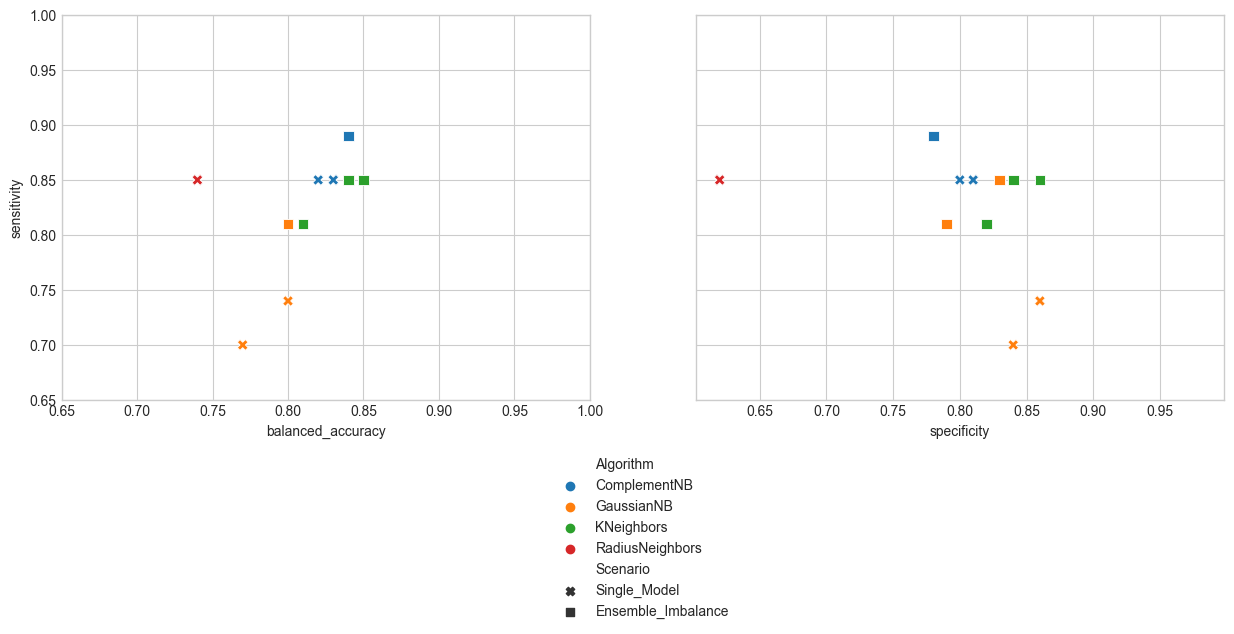

In [137]:
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharey=True)

sns.scatterplot(
    ax=axs[0],
    data=df_all, 
    y="sensitivity", 
    x="balanced_accuracy", 
    hue="Algorithm", 
    style="Scenario",
    markers={"Single_Model": "X", "Ensemble_Imbalance": "s"},
    s=60,
    legend=False,
)
axs[0].set_ylim(0.65, 1.0)
axs[0].set_xlim(0.65, 1.0)

sns.scatterplot(
    ax=axs[1],
    data=df_all, 
    y="sensitivity", 
    x="specificity", 
    hue="Algorithm", 
    style="Scenario",
    markers={"Single_Model": "X", "Ensemble_Imbalance": "s"},
    s=60,
)
# axs[0].set_ylim(0.65, 1.0)
# axs[0].set_xlim(0.65, 1.0)

plt.legend(loc='lower center', bbox_to_anchor=(-0.1, -0.6))


In [88]:
df_all.Algorithm.unique()

array(['ComplementNB', 'ComplementNB ', 'GaussianNB', 'GaussianNB ',
       'KNeighbors', 'KNeighbors ', 'RadiusNeighbors'], dtype=object)

(0.5, 1.0)

<Figure size 500x500 with 0 Axes>

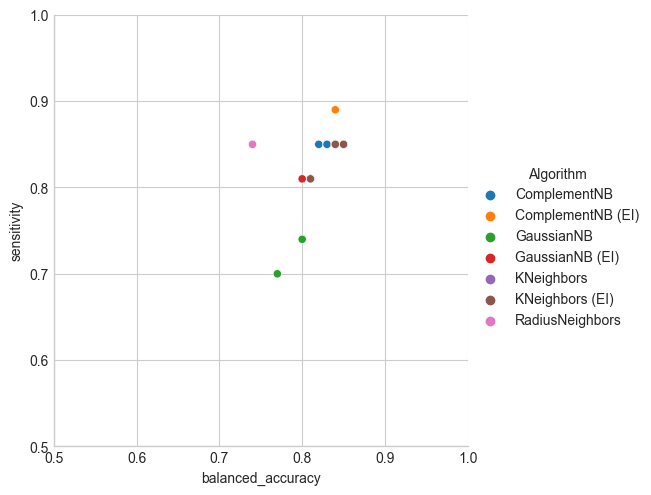

In [83]:
# Plot the lines on two facets
plt.figure(figsize=(5,5))
sns.relplot(
    data=df_all,
    y="sensitivity",
    x="balanced_accuracy", 
    hue="Algorithm", 
#     size="choice", 
#     col="Scenario",
#     kind="line", 
#     size_order=["T1", "T2"], 
#     palette='colorblind',
#     height=5, 
#     aspect=.75, 
#     facet_kws=dict(sharex=False),
)
# plt.legend(loc='upper right')
plt.ylim(0.5, 1.0)
plt.xlim(0.5, 1.0)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


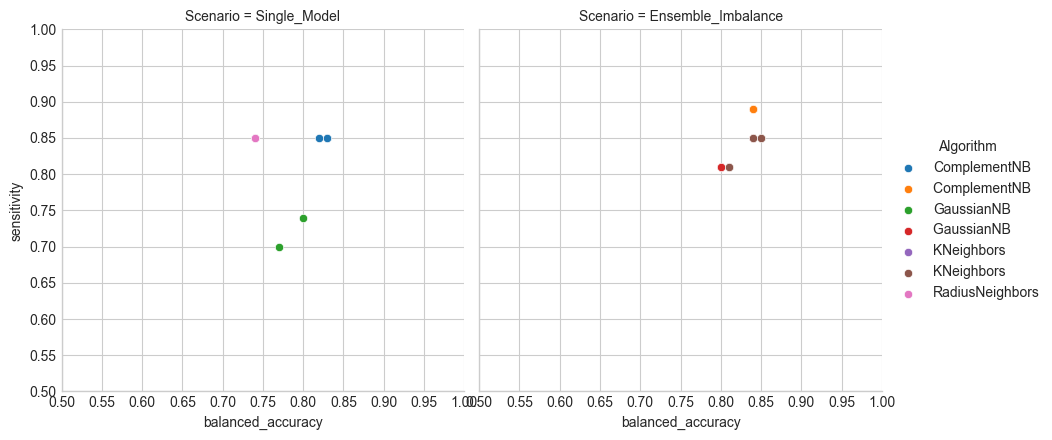

In [76]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(
    df_all, 
    hue="Algorithm", 
    col="Scenario", 
#     palette="tab20c",
    col_wrap=2, 
    height=4.5,
#     legend_out=True
)

# plt.xlim(0.80, 1.0)

# Draw a horizontal line to show the starting point
# grid.refline(y=df_all.sensitivity.max(), linestyle=":", c='red', alpha=0.3, label='')
# grid.refline(x=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)

# Draw a line plot to show the trajectory of each random walk
grid.map(
    sns.scatterplot, 
    "balanced_accuracy", 
    "sensitivity", 
    marker="o",
    
)

# Adjust the tick positions and labels
grid.set(
    xticks=np.arange(0.5, 1.01, .05), 
    yticks=np.arange(0.5, 1.01, .05),
    xlim=(0.50, 1.0), 
    ylim=(0.50, 1.0)
)

grid.add_legend()

# Adjust the arrangement of the plots
# grid.fig.tight_layout(w_pad=1)

In [ ]:
np.arange(0.8, 1.01, .05)

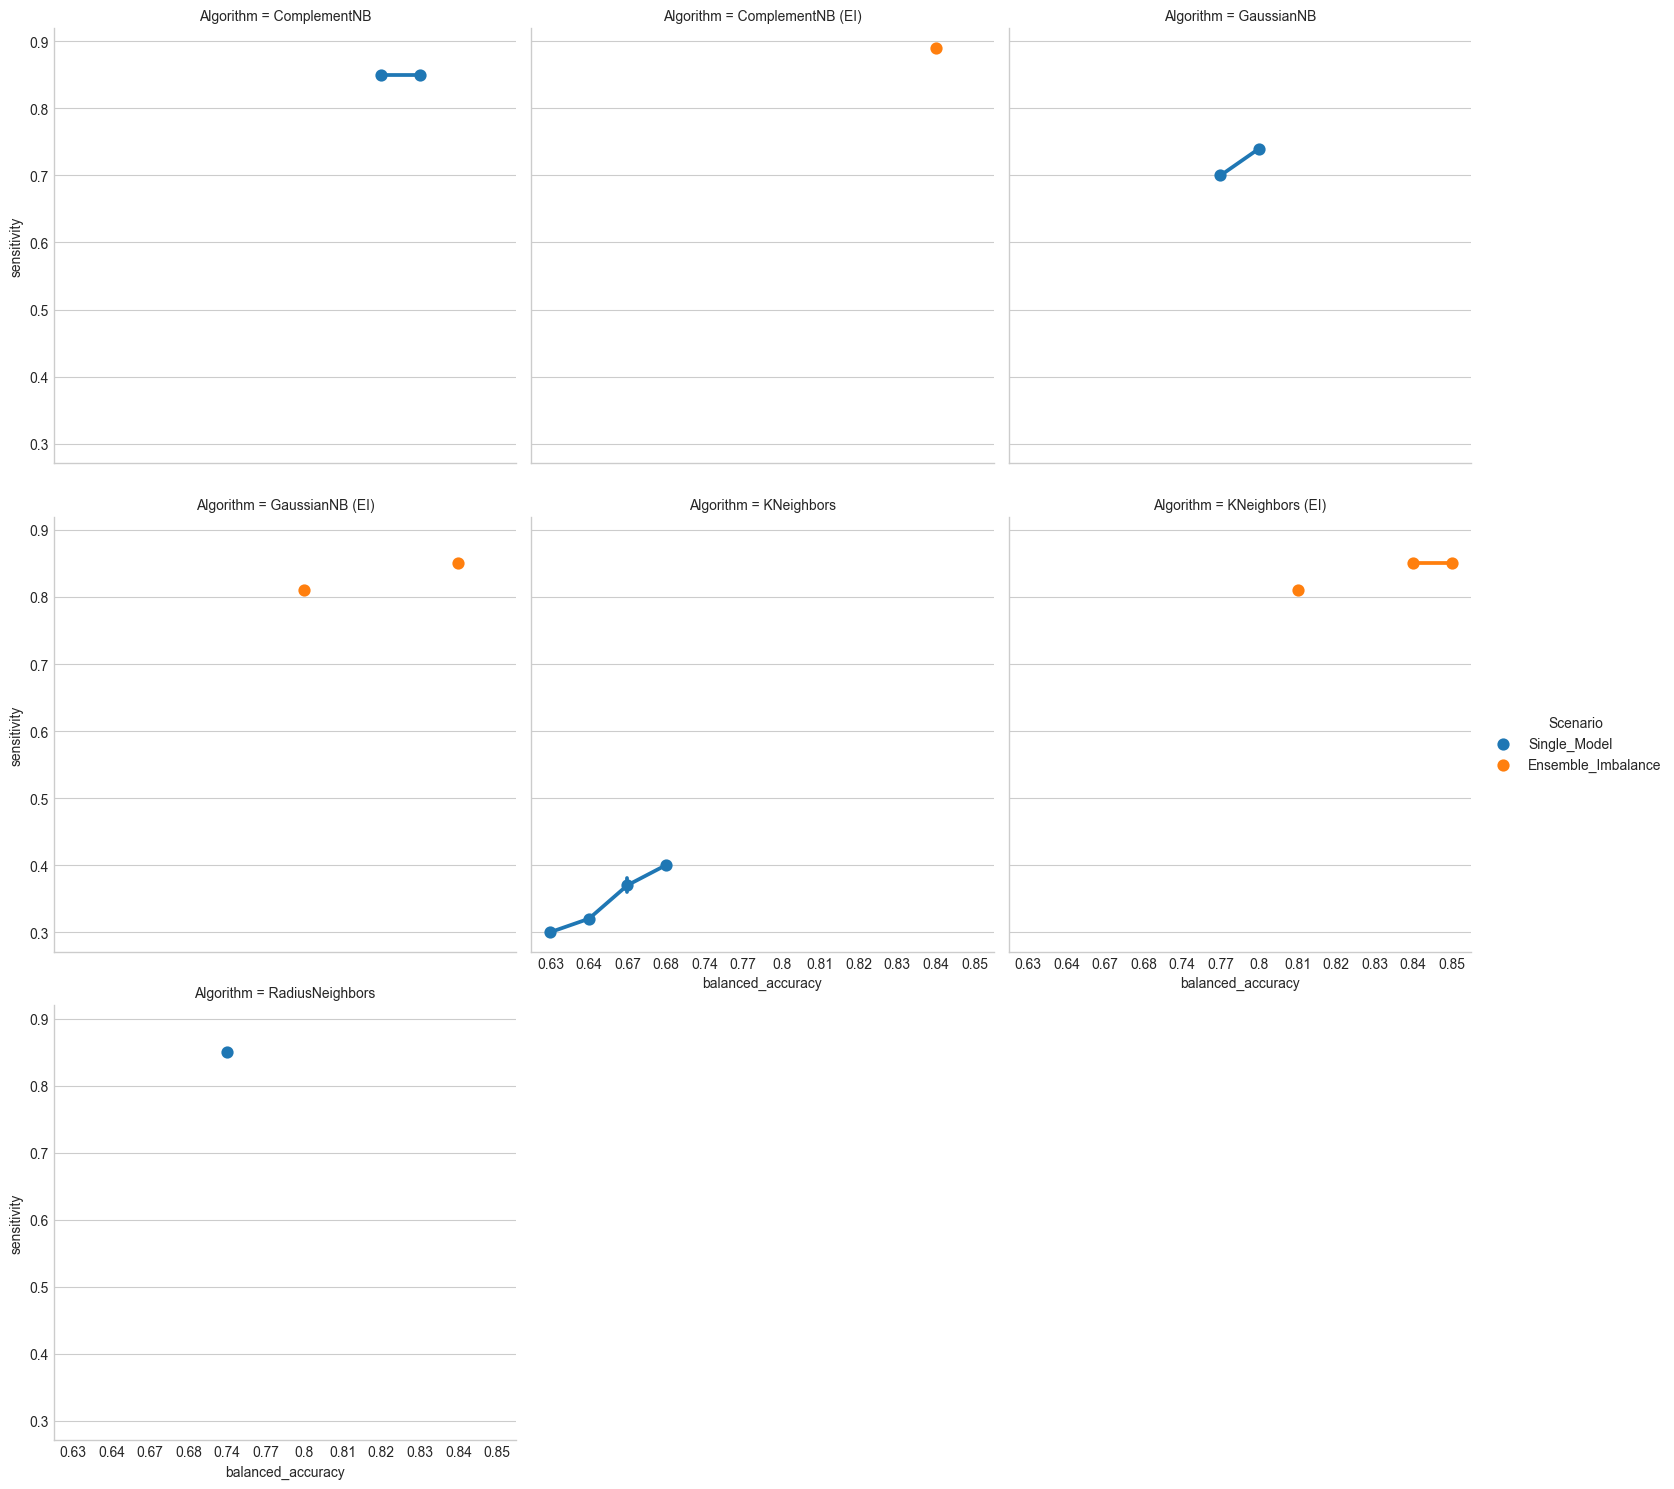

In [70]:
# fig, ax = plt.subplots()

g = sns.catplot(
    data=df_all, 
    x="balanced_accuracy", 
    y="sensitivity", 
    col="Algorithm", 
    hue="Scenario",
#     capsize=.2, 
#     palette="YlGnBu_d", 
#     errorbar="se",
    kind="point", 
#     height=6, 
#     aspect=.5,
    
#     sharex=True,
#     sharey=True,
    col_wrap=3,
)

# for i, ax in enumerate(g.axes.flat):  # set every-other axis for testing purposes
#     ax.set_xlim(0., 1.)
# #     pass

# g.despine(left=True)

# g.set(ylim=(0.8 ,1))
# g.set_xlim(.8, .9, 1.)

# g.set(xlim=(0.8 ,1))

# plt.ylim(.8, 1.)
# plt.xlim(.8, 1.)

# g.set(ylim=( 0., 1.), xlim=( 0., 1.))
# axes[0,1].set_ylim(0,)
# plt.show()